In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
transform = transforms.ToTensor()

train_data = datasets.FashionMNIST(root='./dataset', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./dataset', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=512, shuffle=True)
test_loader = DataLoader(test_data, batch_size=512, shuffle=False)


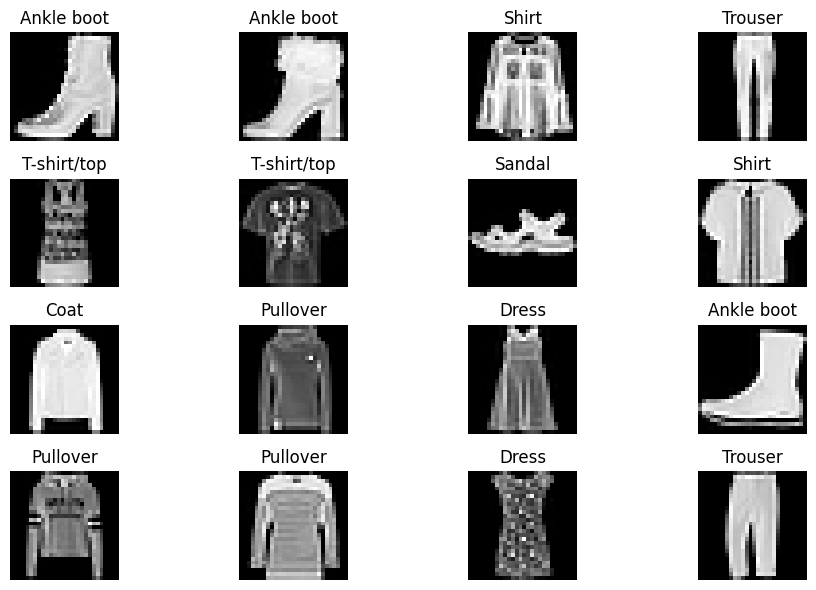

In [3]:
# Class labels for FashionMNIST
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
# Get one batch of images
images, labels = next(iter(train_loader))

# Plot the images
plt.figure(figsize=(10, 6))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
class FashionClassifier(nn.Module):
    def __init__(self):
        super(FashionClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),                  # 28x28 → 784
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)             # 10 classes
        )

    def forward(self, x):
        return self.model(x)


In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FashionClassifier().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [6]:
epochs = 10
import time

start_time = time.time()
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

end_time = time.time()
print(f"Training took {(end_time - start_time):.2f} seconds")


Epoch 1, Loss: 0.8913
Epoch 2, Loss: 0.4881
Epoch 3, Loss: 0.4312
Epoch 4, Loss: 0.4077
Epoch 5, Loss: 0.3825
Epoch 6, Loss: 0.3736
Epoch 7, Loss: 0.3580
Epoch 8, Loss: 0.3459
Epoch 9, Loss: 0.3347
Epoch 10, Loss: 0.3287
Training took 82.97 seconds


In [7]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 86.78%
